# Chapter 3: Sampling the Imaginary

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy.stats as st

In [106]:
def grid_approximation(successes, observations, n_points=100, prior=None):
    p_grid = np.linspace(0, 1, n_points)
    #if no prior provided use uniform
    if isinstance(prior, type(None)):
        prior = [1] * n_points
    likelihood = st.binom.pmf(successes, observations, p_grid)
    unstandardized_posterior = likelihood * prior
    posterior = unstandardized_posterior / sum(unstandardized_posterior)
    return pd.Series(posterior, index=p_grid)

In [107]:
p_grid = np.linspace(0, 1, 100)
posterior = grid_approximation(6, 9)

samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)


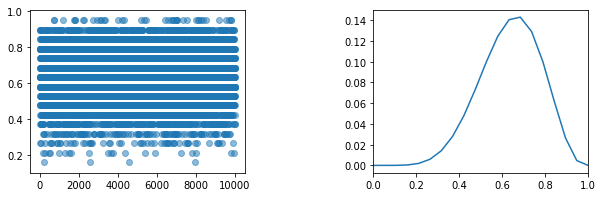

In [28]:
fig = plt.figure(figsize=(10,3))
fig.subplots_adjust(hspace=0.8, wspace=0.6)

ax = fig.add_subplot(1, 2, 1)
ax.scatter(range(int(1e4)), samples, alpha=0.5)

ax = fig.add_subplot(1, 2, 2)
posterior.plot(ax=ax)


### 3.2.2 Intervals of Defined Mass

#### Percentile Intervals

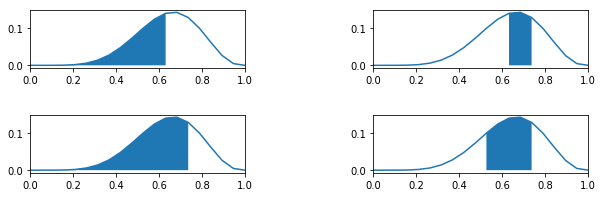

In [65]:
fig = plt.figure(figsize=(10,3))
fig.subplots_adjust(hspace=0.8, wspace=0.6)

i = 1
intervals = [(0, .5), (.5, .75), (0, .8), (0.2, 0.8)]
for lower, upper in intervals:
    ax = fig.add_subplot(2, 2, i)
    posterior.plot(ax=ax)
    x_fill = posterior.loc[np.percentile(samples, lower*100):np.percentile(samples, upper*100)].index
    y_fill = posterior.loc[np.percentile(samples, lower*100):np.percentile(samples, upper*100)].values
    ax.fill_between(x_fill, y_fill)
    i+=1

#### Highest Posterior Density Interval (HPDI)

array([0.52631579, 0.68421053])

Text(0.5, 1.0, '50% PI')

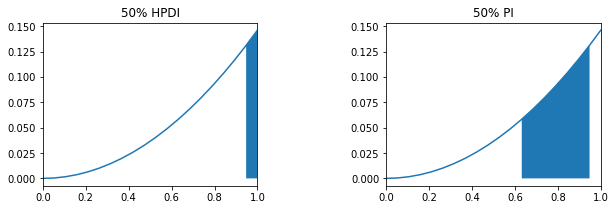

In [79]:
fig = plt.figure(figsize=(10,3))
fig.subplots_adjust(hspace=0.8, wspace=0.6)


posterior = grid_approximation(2, 2)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
ax = fig.add_subplot(1, 2, 1)
posterior.plot(ax=ax)

lower, upper = pm.hpd(samples, alpha=0.5)
x_fill = posterior.loc[np.percentile(samples, lower*100):np.percentile(samples, upper*100)].index
y_fill = posterior.loc[np.percentile(samples, lower*100):np.percentile(samples, upper*100)].values
ax.fill_between(x_fill, y_fill)
ax.set_title('50% HPDI')

ax = fig.add_subplot(1, 2, 2)
posterior.plot(ax=ax)
lower, upper = pm.hpd(samples, alpha=0.5)
x_fill = posterior.loc[np.percentile(samples, 25):np.percentile(samples, 75)].index
y_fill = posterior.loc[np.percentile(samples, 25):np.percentile(samples, 75)].values
ax.fill_between(x_fill, y_fill)
ax.set_title('50% PI')

In [80]:
p_grid[posterior == max(posterior)]

array([1.])

In [81]:

loss = [sum(posterior * abs(p - p_grid)) for p in p_grid]
p_grid[loss == min(loss)]

array([], shape=(0, 20), dtype=float64)

In [103]:
d = 0.5
a = []
for d in np.linspace(0, 1, 20):
    min_expected_loss = min([sum(posterior * abs(d-p)) for p in p_grid])
    a.append([d, min_expected_loss])

In [109]:

loss = [sum(posterior * abs(d-p)) for p in p_grid]
p_grid[loss == min(loss)]

array([], shape=(0, 100), dtype=float64)

In [110]:
#p_grid
#loss
loss
#[min(loss)]

[1.0,
 0.9898989898989896,
 0.9797979797979797,
 0.9696969696969692,
 0.9595959595959593,
 0.9494949494949493,
 0.9393939393939392,
 0.9292929292929292,
 0.9191919191919188,
 0.909090909090909,
 0.8989898989898989,
 0.8888888888888887,
 0.8787878787878783,
 0.8686868686868681,
 0.8585858585858583,
 0.8484848484848484,
 0.8383838383838381,
 0.8282828282828283,
 0.818181818181818,
 0.8080808080808075,
 0.7979797979797977,
 0.7878787878787877,
 0.7777777777777776,
 0.7676767676767674,
 0.7575757575757573,
 0.7474747474747471,
 0.7373737373737371,
 0.7272727272727273,
 0.7171717171717169,
 0.707070707070707,
 0.6969696969696968,
 0.6868686868686867,
 0.6767676767676765,
 0.6666666666666666,
 0.6565656565656564,
 0.6464646464646463,
 0.6363636363636361,
 0.626262626262626,
 0.6161616161616159,
 0.6060606060606055,
 0.5959595959595957,
 0.5858585858585856,
 0.5757575757575756,
 0.5656565656565654,
 0.5555555555555557,
 0.5454545454545452,
 0.5353535353535351,
 0.5252525252525249,
 0.51515151

In [95]:
p_grid[np.where(lambda x: x>0.5)]

array([0.])